<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Module_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 11

Code Block 0: Make a hypothesis. 

Code Block 1: Gather Data

Code Block 2: Test data 

Code Block 3: Interpret results

In [ ]:
### Code Block 0: Make a hypothesis
# What populations are you investigating? What do you suppose is true? 



The p-value of this test is 0.0004098426 which is like flipping 11 coins and getting all heads.


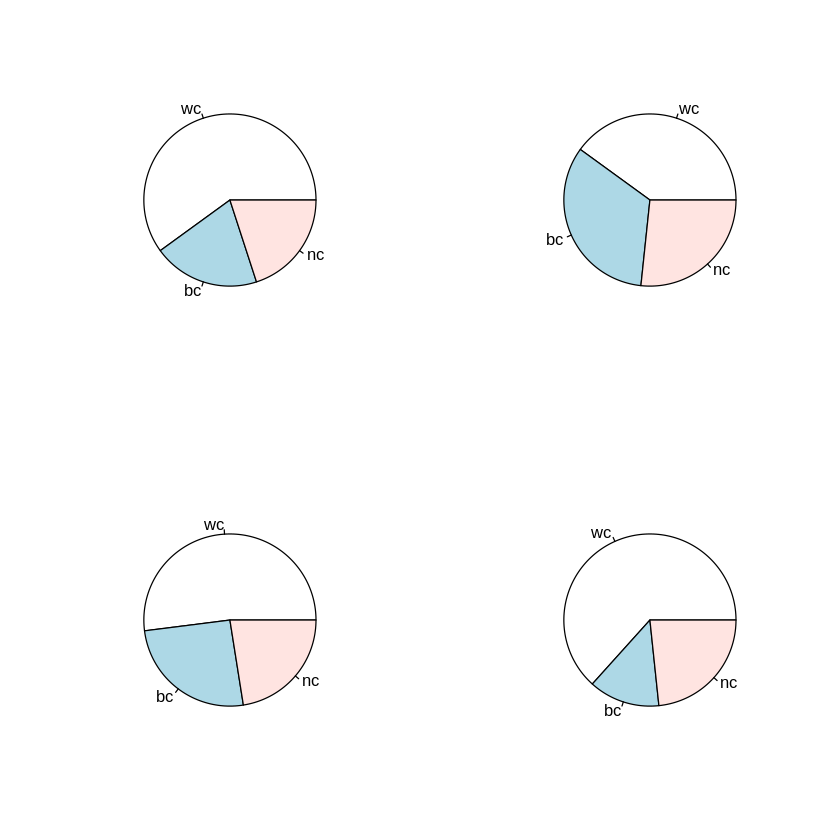

In [1]:
### Code Block 1: Gather Data 

# In the fake sample below, alpha, beta, gamma, and delta populations were sampled.
# In each sample, the total of white collar, blue collar, and no collar workers were reported. 

wc=c(90, 60, 104, 95)
bc=c(30, 50, 51, 20)
nc=c(30, 40, 45, 35)

all_data = rbind(wc, bc, nc)
all_data = data.frame(all_data)
names(all_data)=c("Alpha", "Beta", "Gamma", "Delta")
cats = c("wc","bc", "nc")

### Code Block 2: Analyze the Data
par(mfrow=c(2,2))
pie(all_data$Alpha, labels = cats)
pie(all_data$Beta, labels = cats)
pie(all_data$Gamma, labels = cats)
pie(all_data$Delta, labels = cats)
results = chisq.test(all_data)

write.csv(all_data, "chisq_test.csv")


#### Code Block 3: Interpret results 
pval = results$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")


The p-value of this test is 0.0004098426 which is like flipping 11 coins and getting all heads.


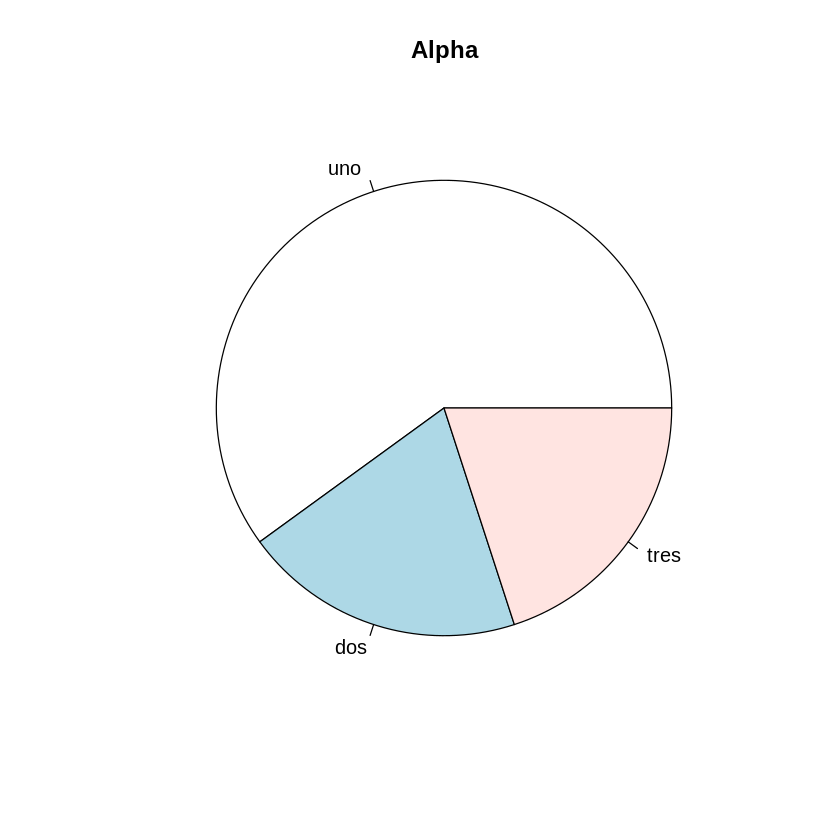

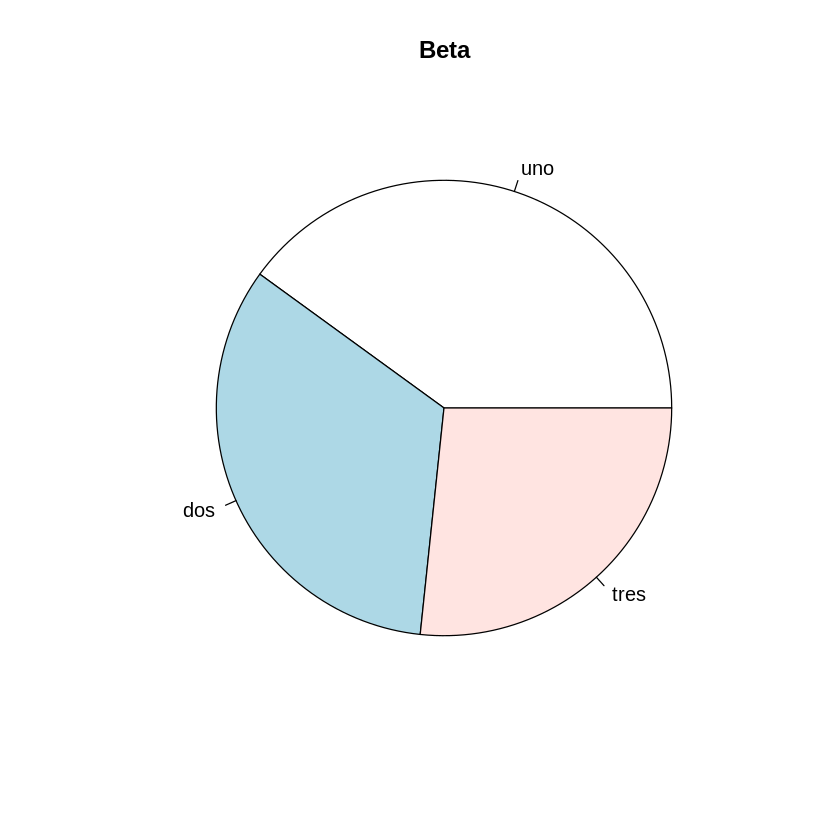

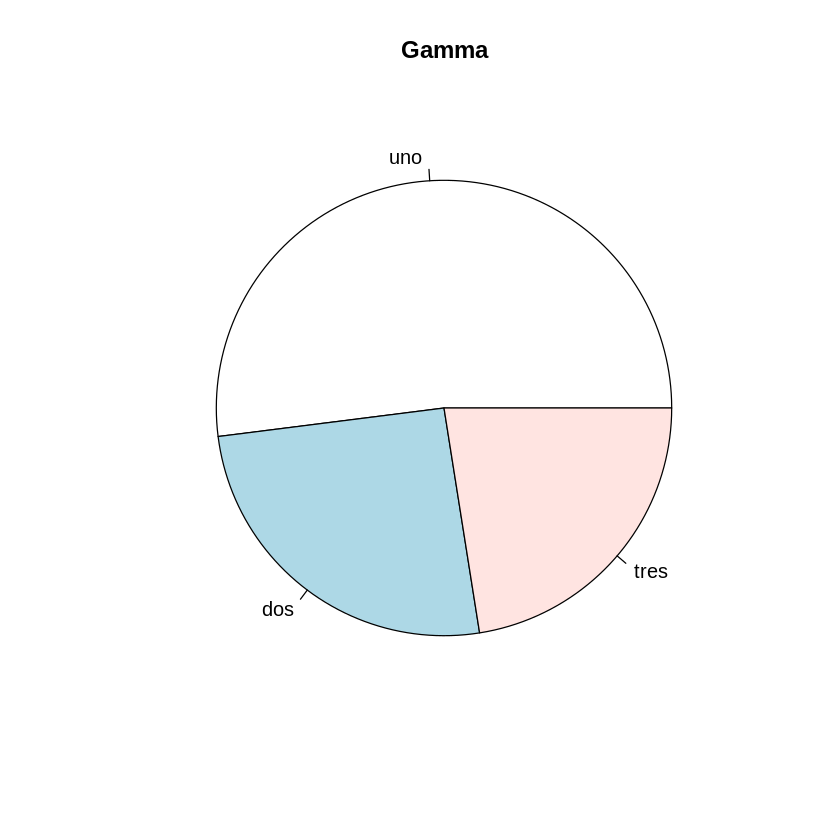

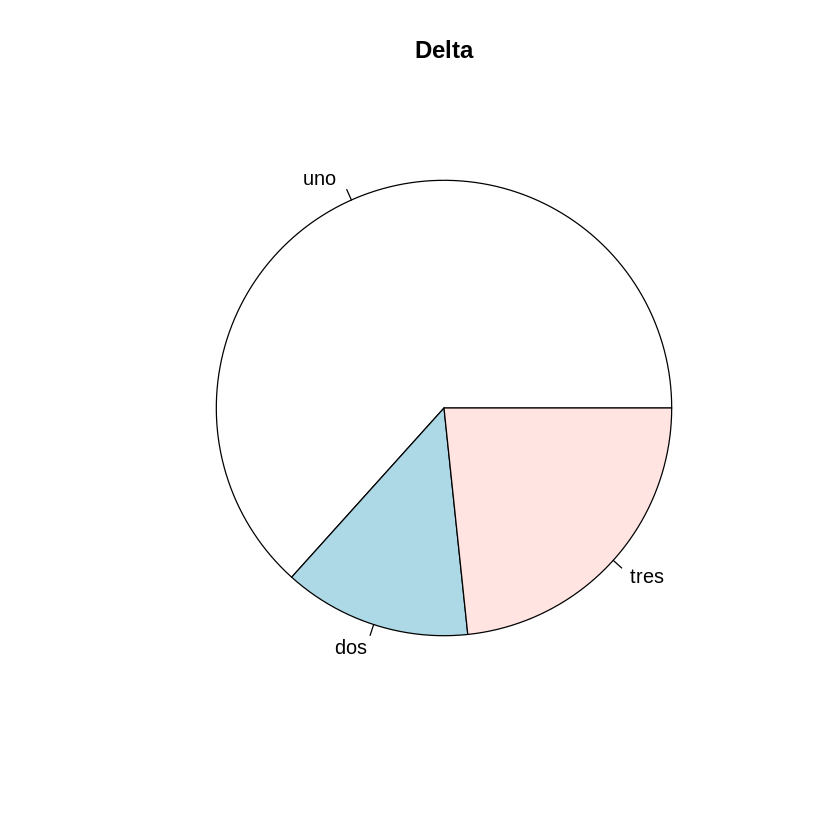

In [25]:
#### Data format for upload:   
# first row: (blank) (category 1) (category 2) (category 3) .. 
# next rows: (population 1) (count of cat. 1 in pop. 1) (count of cat. 2 in pop. 1) ... 
# The default data came from three populations: uno, dos, and tres. 
# Each population was counted by subpopulation for features Alpha, Beta, Gamma, and Delta. 
# This test checks to see if the ratio A:B:G:D is the same across populations or if one of the populations is not like the others. 

mydata = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/chisq_testdata.csv"))

groups = mydata$X
chi_data = mydata[,-1] 

results = chisq.test(chi_data)

pval = results$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")


for (i in 1:length(names(chi_data))){
  pie(chi_data[,i], labels = groups, main=names(chi_data[i]))
}


The p-value of this test is really tiny which is like flipping 39 coins and getting all heads.


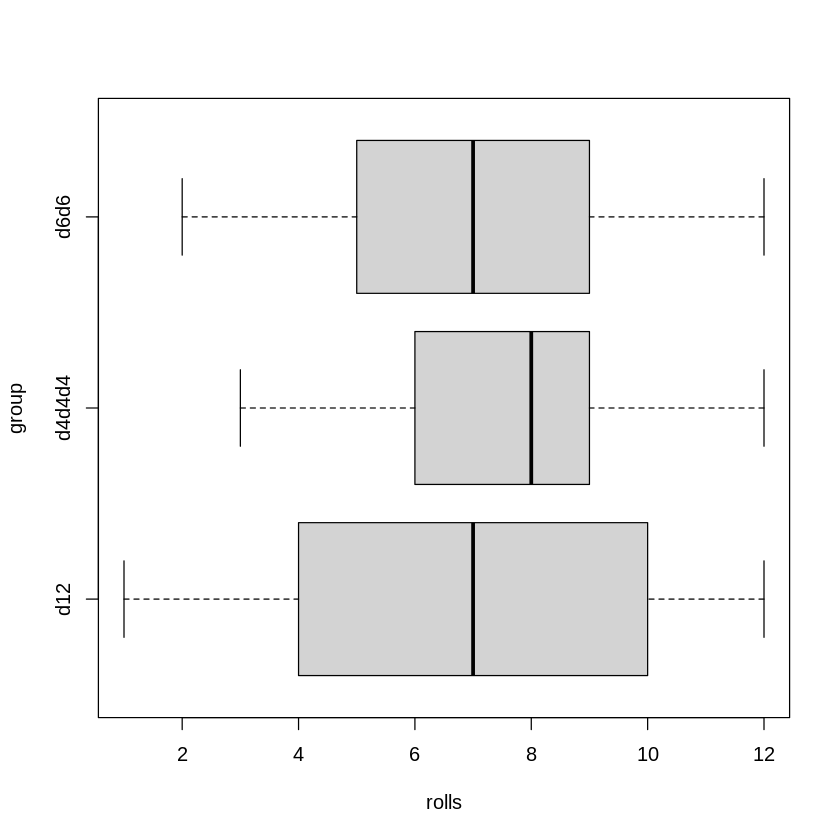

In [ ]:
### quantitative data with ANOVA 
#http://www.sthda.com/english/wiki/one-way-anova-test-in-r

### Code Block 1: Gather data

d12 <- 0
d6d6 <- 0
d4d4d4 <- 0

for (i in 1:1000){
  d12[i] = sample(1:12,1)
  d6d6[i] = sample(1:6,1) + sample(1:6,1) 
  d4d4d4[i] = sample(1:4,1) + sample(1:4,1) + sample(1:4,1)
}

rolls = c(d12, d6d6, d4d4d4)
group = rep(c("d12", "d6d6", "d4d4d4"), c(1000,1000,1000))

mydata = data.frame(rolls, group)

#### Code Block 2: Analyze the data


boxplot(rolls ~ group, mydata, horizontal=T)
anovadata = anova(lm(rolls~group, mydata))


#### Code Block 3: Interpret the results

pval = anovadata$'Pr(>F)'[1]
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")
